# **Linear Regression**


Linear Regression is a method to find a relationship between input variables (features) and an output variable (target).

***Importing Basic Libraries***

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

**How can we load it in Python using pandas and see the first few rows?**.

In [56]:
df=pd.read_csv("Food_Delivery_Times.csv")

df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


## Exploring the Data**

Check your dataset by some of the commands to quickly see its size, column names, missing values, and basic statistics.

In [57]:
df.shape

(1000, 9)

In [58]:
df.columns

Index(['Order_ID', 'Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day',
       'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs',
       'Delivery_Time_min'],
      dtype='object')

In [59]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [60]:
df.isnull().sum()

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

In [61]:
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


### Handling Null Values
Fill the missing values in the categorical columns by replacing them with the most frequent value in each column.

In [62]:
cat_col=["Weather","Traffic_Level","Time_of_Day"]
for col in cat_col:
    df[col]=df[col].fillna(df[col].mode()[0])

<Axes: xlabel='Courier_Experience_yrs', ylabel='Count'>

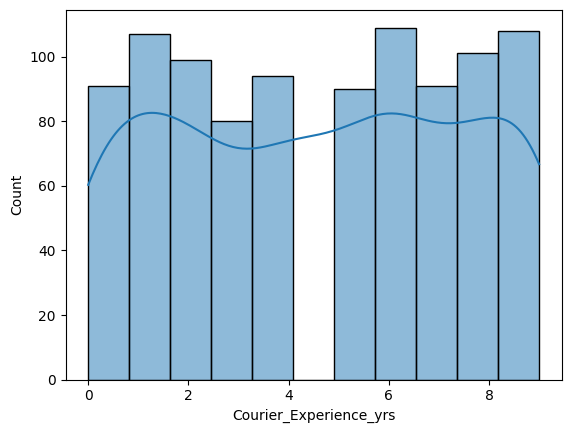

In [63]:
sns.histplot(df["Courier_Experience_yrs"],kde=True)

In [64]:
df["Courier_Experience_yrs"]=df["Courier_Experience_yrs"].fillna(df["Courier_Experience_yrs"].median())

In [65]:
df.isnull().sum()

Order_ID                  0
Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64

## Visualizing the Data
Visualize the relationships between all pairs of variables in the dataset to see patterns and correlations.

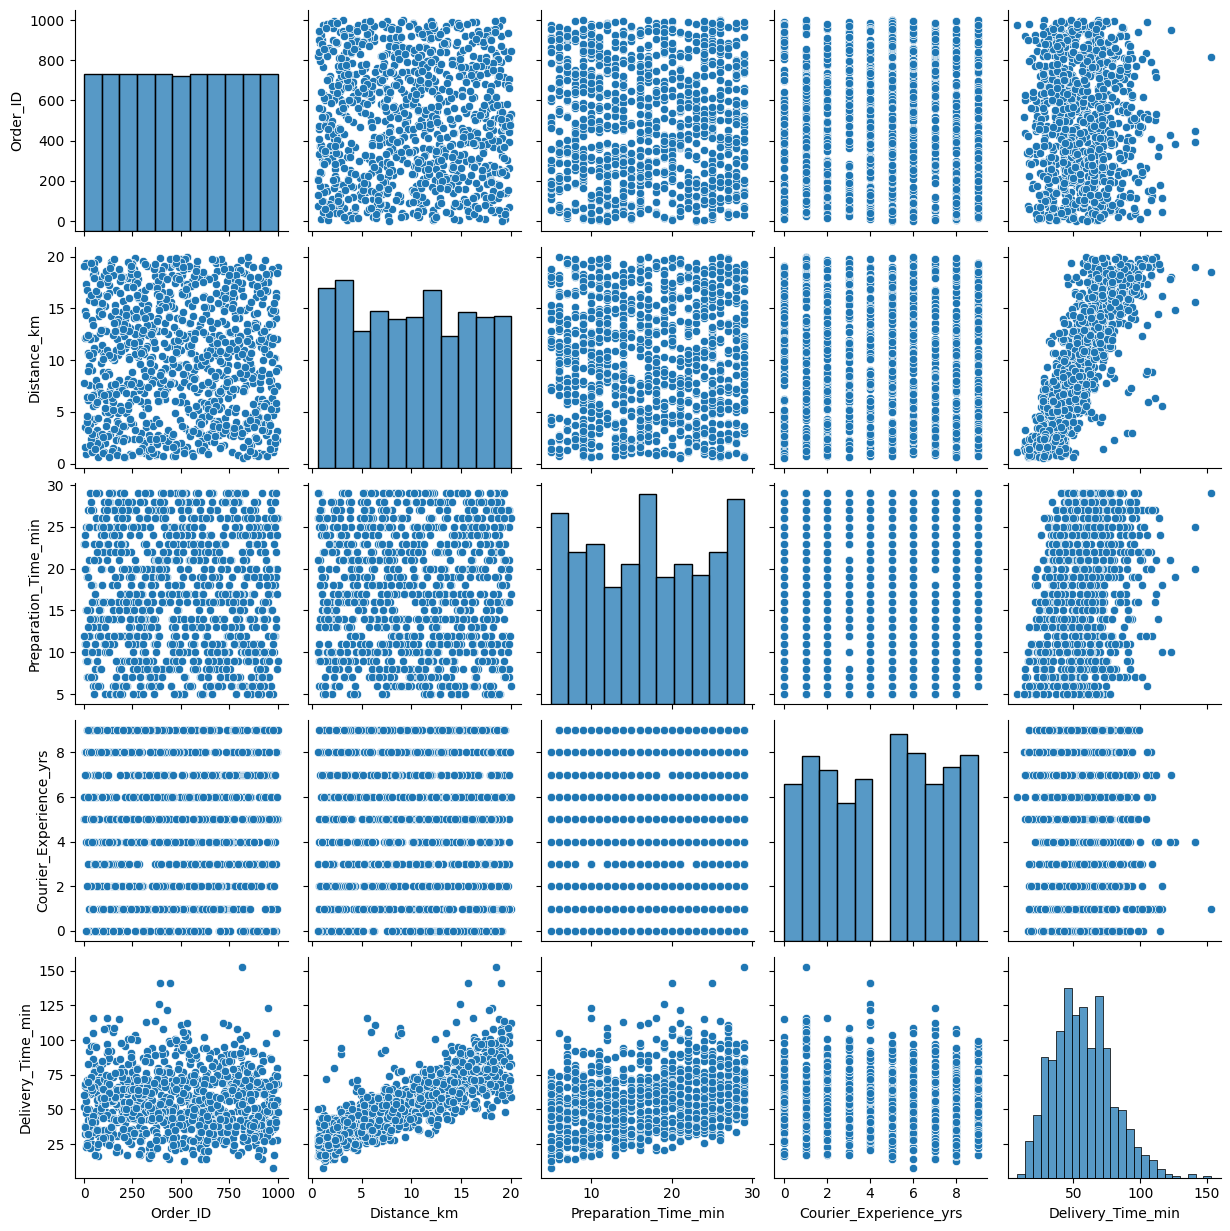

In [66]:
sns.pairplot(df)

### Mapping Values
Linear Regression works only on numeric data, so we need to convert categorical columns into numbers.

In [67]:
from sklearn.preprocessing import LabelEncoder
import pickle

label_encoders = {}

categorical_cols = [
    "Weather",
    "Traffic_Level",
    "Time_of_Day",
    "Vehicle_Type"
]

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [68]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,4,1,0,2,12,1.0,43
1,738,16.42,0,2,1,0,20,2.0,84
2,741,9.52,1,1,3,2,28,1.0,59
3,661,7.44,2,2,0,2,5,1.0,37
4,412,19.03,0,1,2,0,16,5.0,68


## **Defining Features and Target**

X (features) → known factors (distance, traffic, weather, etc.)

y (target) → what we want to predict (delivery time)


In [69]:
X_encoded=df.drop("Delivery_Time_min",axis=1)
y_encoded=df["Delivery_Time_min"]



## Splitting Data into Train and Test Sets**

How can we check how well our model performs on unseen data?
Why do we split the dataset into two parts:

Training set (80%) → used to train the model

Testing set (20%) → used to evaluate the modelbrary.


In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_encoded,y_encoded,test_size=0.2,random_state=42)

## Training the Linear Regression Model**


In [71]:
from sklearn.linear_model import LinearRegression
model_encoded=LinearRegression()
model_encoded.fit(X_train,Y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [72]:
y_pred=model_encoded.predict(X_test)
from sklearn.metrics import mean_squared_error,r2_score
mean_squared_error(Y_test,y_pred)
r2=r2_score(Y_test,y_pred)
n=df.shape[0]
p=df.shape[1]
adjusted_r2=1-((1-r2)*(n-1))/(n-p-1)
print(adjusted_r2)

0.7540689011469631


## Making Predictions

Use the trained model to predict delivery times for the test data.

## **Evaluating the Model**

Check how accurate your predictions are by calculating the average error, squared error, and R² score.


### **Visualizing Predictions**


Create a scatter plot to compare actual vs predicted delivery times and visually check how well the model is performing.


### Ridge Regression
Train a Ridge regression model on the training data, predict delivery times for the test set, and evaluate its accuracy using MAE, MSE, and R².

In [73]:
from sklearn.linear_model import Ridge,Lasso

ridge=Ridge()
ridge.fit(X_train,Y_train)
pred=ridge.predict(X_test)
r2_ridge=r2_score(Y_test,pred)
print("R2 Ridge:",r2_ridge)

R2 Ridge: 0.7562740077724612


### Lasso Regression
Train a Lasso regression model on your training data, predict delivery times for the test set, and check how accurate the predictions are using MAE, MSE, and R².

In [74]:
Lasso=Lasso()
Lasso.fit(X_train,Y_train)
pred_lasso=Lasso.predict(X_test)
r2_lasso=r2_score(Y_test,pred_lasso)
print("R2 Lasso:",r2_lasso)

R2 Lasso: 0.7464268138950625


### Polynomial Regression
Transform your features to include polynomial terms, train a Linear Regression model on them, and calculate the mean squared error to see how well the curved model fits your data.

In [75]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Polynomial Features
poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)   # fit ONLY here
X_test_poly  = poly.transform(X_test)        # transform ONLY here

# Model
model_poly = LinearRegression()
model_poly.fit(X_train_poly, Y_train)

# Prediction
y_pred = model_poly.predict(X_test_poly)

# R2 Score
r2_poly = r2_score(Y_test, y_pred)
print("R2 Polynomial:", r2_poly)


R2 Polynomial: 0.7858461834220851


In [76]:
df.columns

Index(['Order_ID', 'Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day',
       'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs',
       'Delivery_Time_min'],
      dtype='object')

# Conclusion
-Predicted food delivery times using features like distance, traffic, weather, time, and courier experience.

-Applied Linear Regression for basic predictions.

-Used Ridge and Lasso to reduce overfitting and improve accuracy.

-Explored Polynomial Regression to capture nonlinear relationships.

-Evaluated models with MAE, MSE, and R² to measure performance.

-Demonstrated a real-world application of regression in optimizing delivery operations.

In [77]:
final_bundle = {
    "model": model_poly,
    "poly": poly,
    "label_encoders": label_encoders
}

with open("delivery_time.pkl", "wb") as f:
    pickle.dump(final_bundle, f)

print("✅ NEW delivery_time.pkl CREATED")


✅ NEW delivery_time.pkl CREATED


In [78]:
df

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,4,1,0,2,12,1.0,43
1,738,16.42,0,2,1,0,20,2.0,84
2,741,9.52,1,1,3,2,28,1.0,59
3,661,7.44,2,2,0,2,5,1.0,37
4,412,19.03,0,1,2,0,16,5.0,68
...,...,...,...,...,...,...,...,...,...
995,107,8.50,0,0,1,1,13,3.0,54
996,271,16.28,2,1,2,2,8,9.0,71
997,861,15.62,3,0,1,2,26,2.0,81
998,436,14.17,0,1,0,0,8,0.0,55
